In [1]:
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend
from tensorflow.keras.constraints import min_max_norm
from tensorflow.keras import Input
from tensorflow.keras import initializers
import os as os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [2]:
# Function to initialize GPU
def prep_gpu():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')

    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))


In [3]:
# Function to synthetically generate data
def generate_data():
    X, y, coef = datasets.make_regression(n_samples=1000000, n_features=100, n_informative=10, coef=True)
    y = np.reshape(y, newshape=[1000000, 1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test, coef

In [4]:
# Function to get data from file
def get_data():
    df = pd.read_csv(filepath_or_buffer='./DATA/fake_reg.csv')
    X = df[['feature1', 'feature2']]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, y_train, X_test, y_test

In [5]:
# Get training and test sets
#X_train, y_train, X_test, y_test, coef = generate_data()
#print("Coefficients: {}".format(coef))

X_train, y_train, X_test, y_test = get_data()
print("Training records:{}\tTest records:{}".format(len(X_train), len(X_test)))

Training records:700	Test records:300


In [6]:
# Prepare the GPU
prep_gpu()

Physical GPUs: 1	Logical GPUs: 1
Physical CPUs: 1	Logical CPUs: 1


In [9]:
# Define model
backend.clear_session()
model = Sequential()

model.add(Input(shape=(2,)))
model.add(layer=Dense(4, activation='relu'))
model.add(layer=Dense(4, activation='relu'))
model.add(layer=Dense(4, activation='relu'))
#model.add(layer=Dense(4, activation='relu'))
model.add(layer=Dense(1))

model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fit the model to the training data with CPU device
with tf.device(device_name='/device:cpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
70/70 [==============================] - 0s 2ms/step - loss: 257135.0625
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 257036.2031
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 256906.2812
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 256725.0000
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 256475.1094
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 256127.7500
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 255659.1094
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 255030.5312
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 254215.2500
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 253176.3594
Epoch 11/100
70/70 [==============================] - 0s 2ms/step - loss: 251865.7656
Epoch 12/100
70/70 [==============================] - 0s 2ms/st

In [10]:
# Fit the model to the training data with GPU device
with tf.device(device_name='/device:gpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=10, verbose=1)


Epoch 1/100
70/70 [==============================] - 0s 2ms/step - loss: 256932.8906
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 256496.4062
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 255858.5312
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 254940.8281
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 253671.8594
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 251970.0781
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 249726.1562
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 246862.8281
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 243265.8125
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 238847.0469
Epoch 11/100
70/70 [==============================] - 0s 2ms/step - loss: 233508.0625
Epoch 12/100
70/70 [==============================] - 0s 2ms/st

<AxesSubplot:>

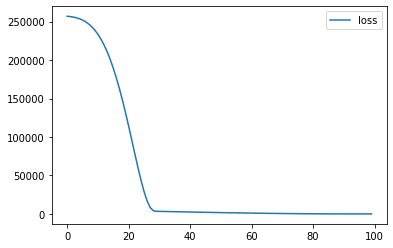

In [11]:
# Evaluate model performance
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()